# Playing with the dummy files to create a graphing script

In [33]:
import os
from LSMemoryModel.constants.paths import OBJECT_DUMP_PATH, FIGURES_PATH
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pickle as pkl

In [48]:
def load_object(filename):
    """
    Loads the object from filename from object_dump folder.
    """
    filename = os.path.join('/Users/ketanjog/Documents/zuckerman_research/Summer_2022/LSMemoryModel/etc/reduced_run', filename)
    with open(filename, "rb") as input:
        obj = pkl.load(input)
    return obj

In [49]:

def make_plots_pretty():
    """
    Sets the standard plotting parameters
    """
    plt.style.use("ggplot")
    font = {"size": 22}
    plt.rc("font", **font)

In [50]:
def plot_ci_ltm_run(
            stm_learning_rate=None,
            ltm_learning_rate=None, 
            num_contexts=None, 
            num_actions=None, 
            context_epsilon=None,
            action_epsilon_positive=None,
            action_epsilon_negative=None,
            beta_stm=None,
            beta_ltm=None,
            save=False,
            folder=None,
            y_lim=None
    
    ):
    """
    Makes a plot of the lines with confidence intervals.
    Assumes that runs is a dictionary with they keys being the names of the runs
    and the values being a list of length num_runs. You can pass an $x_axis$
    value to change the values displayed on the x axis.
    """
    # Set basic params
    make_plots_pretty()

    # Get data, x_label and title
    runs, x_label, title = load_set_ltm(
                                stm_learning_rate=stm_learning_rate,
                                ltm_learning_rate=ltm_learning_rate, 
                                num_contexts=num_contexts, 
                                num_actions=num_actions, 
                                context_epsilon=context_epsilon,
                                action_epsilon_positive=action_epsilon_positive,
                                action_epsilon_negative=action_epsilon_negative,
                                beta_stm=beta_stm,
                                beta_ltm=beta_ltm)
    # Set Y_label, name and other figure constants
    
    
    #Set sweep vals:
    def get_sweep_vals(iterable):
        sweep_vals = []
        if iterable == 'ltm_learning_rate':
            sweep_vals = [stm_learning_rate * i for i in sweep_new["ltm_learning_rate_ratio"]]
        elif iterable == 'beta_ltm':
            sweep_vals = [beta_stm*i for i in sweep_new["beta_ltm_ratio"]]
        else:
            sweep_vals = sweep_new[iterable]

        return sweep_vals

    
    
    
    y_label = "Total Rewards"
    name = title
    ci=0.95,
    figsize=(10, 10)
    x_axis = np.arange(0,len(runs.items()) + 1,1)
    horizontal_line_width = 0.25
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    run_colors = {}
    c = 0

    # Iterate through items, create plots
    for rname, run in runs.items():
        if rname not in run_colors:
            run_colors[rname] = colors[c]
            c += 1

        run = np.array(run)
        run = run + np.random.normal(0, 0.01, run.shape)

        # get the confidence interval
        mean, std = np.mean(run, axis=0), np.std(run, axis=0)
        conf_int = norm.interval(ci, loc=mean, scale=std)

        # Set the interval location
        left = x_axis[c] - horizontal_line_width / 2
        top = conf_int[1]
        right = x_axis[c] + horizontal_line_width / 2
        bottom = conf_int[0]

        # plot the interval
        ax.plot([x_axis[c], x_axis[c]], [top, bottom], color=run_colors[rname])
        ax.plot([left, right], [top, top], color=run_colors[rname])
        ax.plot([left, right], [bottom, bottom], color=run_colors[rname])
        ax.plot(x_axis[c], mean, 'o', color=run_colors[rname], label=rname)

    ticks = np.arange(len(get_sweep_vals(x_label))) + 1
    plt.xticks(ticks, get_sweep_vals(x_label))
    
    # CHANGE HERE!!
    if y_lim is not None:
        ax.set_ylim(y_lim)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # fig.legend(loc="upper right", prop={"size": 16})
    
    if save:
        if not os.path.exists(os.path.join(FIGURES_PATH, folder)):
            os.makedirs(os.path.join(FIGURES_PATH, folder))
        fig.savefig(os.path.join(FIGURES_PATH, folder, f"{name}-ci.png"), dpi=300)

In [51]:
# Values swept over:
sweep = {
"stm_learning_rate": [0.001, 0.01, 0.1, 0.5],
"ltm_learning_rate_ratio" : [0, 0.001, 0.01, 0.1],
"num_contexts" : [1, 2, 5, 10],
"num_actions" : [10, 100, 1000],
"context_epsilon" : [0, 0.01, 0.05, 0.1],
"action_epsilon_positive" : [0.01, 0.05, 0.1],
"action_epsilon_negative" : [0.01, 0.05, 0.1],
"beta_stm" : [1, 10, 50],
"beta_ltm_ratio" : [1, 10,]
}

# New sweep -> pruned version
#---------------------------------------------------------------------------

sweep_new = {
"stm_learning_rate": [0.01, 0.1, 1],
"ltm_learning_rate_ratio" : [0.0, 0.01, 0.1],
"num_contexts" : [5],
"num_actions" : [10, 100],
"context_epsilon" : [0.01, 0.1],
"action_epsilon_positive" : [0.01, 0.1],
"action_epsilon_negative" : [0.01, 0.1],
"beta_stm" : [5, 50],
"beta_ltm_ratio" : [1, 10]
}

# notes: STM = 1 only worked for LTM_rate = 0


#---------------------------------------------------------------------------



# Short hand for title
name = {
    'stm_learning_rate' : "s_LR: ", 
    'ltm_learning_rate' : 'l_LR',
    'num_contexts': "#C: ",
    'num_actions' : "#A: ",
    'context_epsilon': "eps: ",
    'action_epsilon_positive' : "a_ep_p",
    'action_epsilon_negative' : "a_ep_n",
    'beta_stm' : "beta_s",
    'beta_ltm' : "beta_l"
}

# Order
var_at = {
    0: 'stm_learning_rate', 
    1:  'ltm_learning_rate',
    2:  'num_contexts',
    3 : 'num_actions',
    4:  'context_epsilon',
    5: 'action_epsilon_positive',
    6: 'action_epsilon_negative',
    7: 'beta_stm',
    8: 'beta_ltm'
}

# we write down 15 colors
colors = [
    "#1f77b4",  # muted blue
    "#ff7f0e",  # safety orange
    "#2ca02c",  # cooked asparagus green
    "#d62728",  # brick red
    "#9467bd",  # muted purple
    "#e377c2",  # raspberry yogurt pink
    "#7f7f7f",  # middle gray
    "#bcbd22",  # curry yellow-green
    "#17becf",  # blue-teal
    "#aec7e8",  # light blue
    "#ffbb78",  # orange
    "#98df8a",  # yellow-green
    "#ff9896",  # pink
    "#c5b0d5",  # light purple
    "#c49c94",  # chestnut brown
    "#f7b6d2",  # light pink
    "#c7c7c7",  # light gray
    "#dbdb8d",  # tan
    "#9edae5",  # blue-green
]


# Reward epsilon param sweep: 0.01, 0.1, 0.5
# combine beta into learning rate...start LR at 0.1 -> 100
# Ditch high context epsilon cap at 0.1
# Ditch actions over 1000
# nan catch for plotting script
# perhaps reduce num trials
# LTM run -> ?

In [52]:
def load_set_ltm(
            stm_learning_rate=None,
            ltm_learning_rate=None, 
            num_contexts=None, 
            num_actions=None, 
            context_epsilon=None,
            action_epsilon_positive=None,
            action_epsilon_negative=None,
            beta_stm=None,
            beta_ltm=None
            ):
    param_vals = locals().copy()
    title_vars = param_vals.items()

    # check if at least one argument is left unspecified
    if all([i is not None for i in locals().values()]):
        print("One argument needs to be left unspecified, so we can graph along all its values")
        return 0
    
    # Check if exactly 1 argument is left unspecified
    elif sum(x is None for x in locals().values()) > 1:
        print("More than one argument is None, we currently don't have heatmap functionality")
        return 0

    else:
        # Make title
        # title_vars = locals().items()
        title = ""
        params = list(param_vals.values())[:9]
        
        for key, value in title_vars:
            if value is not None:
                label = name[key]
                title += str(label) + str(value) + " "
        
        data = {}
        # Store a copy of input args
        # CHANGE THIS number to be length of input args sequence
        

        if ltm_learning_rate is not None and ltm_learning_rate not in [stm_learning_rate * i for i in sweep["ltm_learning_rate_ratio"]]:
            print("invalid LTM learning rate param")
            return 0
        elif beta_ltm is not None and beta_ltm not in [beta_stm*i for i in sweep["beta_ltm_ratio"]]:
            print("invalid beta ltm parameter")
            return 0
            
        # Get the name of the argument that is unspecified, and iterate over its swept values
        iterable = list(locals().keys())[list(locals().values()).index(None)]

        sweep_vals = []
        if iterable == 'ltm_learning_rate':
            sweep_vals = [stm_learning_rate * i for i in sweep_new["ltm_learning_rate_ratio"]]
        elif iterable == 'beta_ltm':
            sweep_vals = [beta_stm*i for i in sweep_new["beta_ltm_ratio"]]
        else:
            sweep_vals = sweep_new[iterable]

        for param in sweep_vals:
            # Construct filename and load data from it
            file_name = ""
            for i in range(9):
                if file_name != "":
                    file_name += "_"
                
                file_name += str(param) if param_vals[var_at[i]] is None else str(param_vals[var_at[i]])
                
            file_name += ".pkl"
            try:
                data[file_name] = load_object(file_name)
                print(len(data[file_name]))
            except:
                print(f'File {file_name} not present')
            
        return data, iterable, title

In [53]:
sweep_new = {
"stm_learning_rate": [0.01, 0.1, 1],
"ltm_learning_rate_ratio" : [0.0, 0.01, 0.1],
"num_contexts" : [5],
"num_actions" : [10, 100],
"context_epsilon" : [0.01, 0.1],
"action_epsilon_positive" : [0.01, 0.1],
"action_epsilon_negative" : [0.01, 0.1],
"beta_stm" : [5, 50],
"beta_ltm_ratio" : [1, 10]
}
# 1_0.0_5_10_0.01_0.1_0.1_50_500.pkl
# 0.1_0.0001_5_10_0.01_0.1_0.01_5_50.pkl

50
File 0.1_0.0001_5_100_0.01_0.01_0.01_50_500.pkl not present


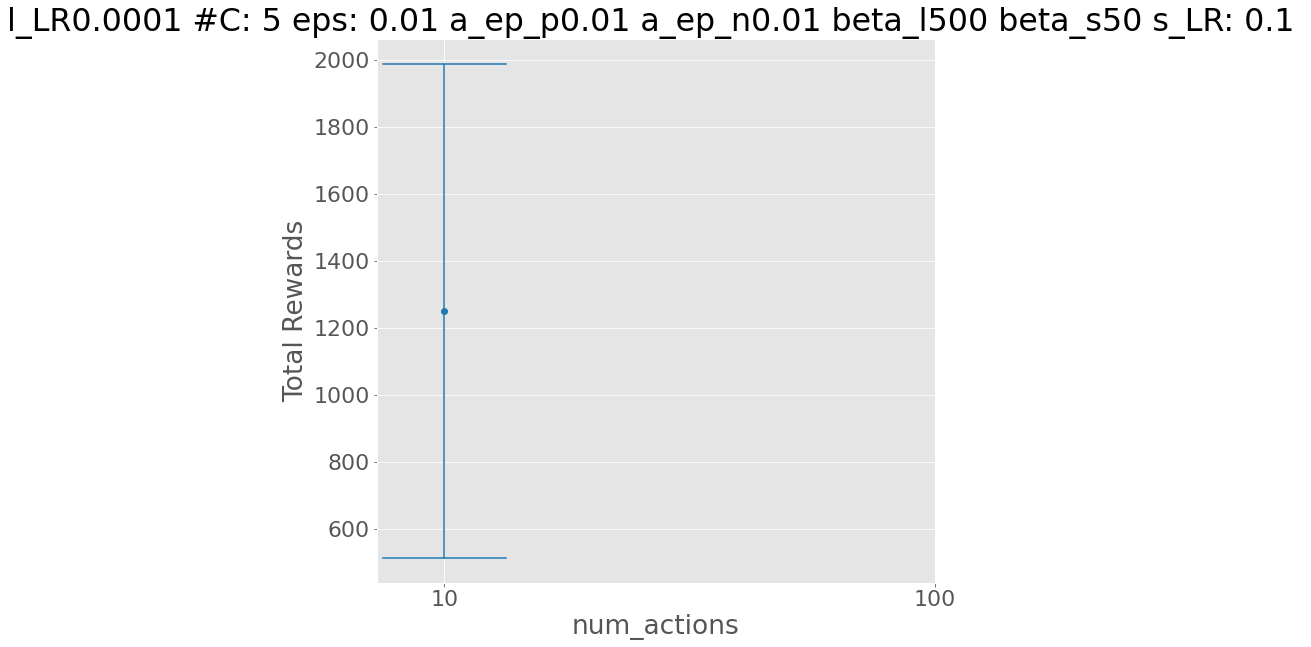

In [68]:
plot_ci_ltm_run(
            stm_learning_rate=0.1,
            ltm_learning_rate=0.0001, 
            num_contexts=5, # fixed
            num_actions=None, 
            context_epsilon=0.01,
            action_epsilon_positive=0.01,
            action_epsilon_negative=0.01,
            beta_stm=50,
            beta_ltm=500,
            save=False,
            folder=None,
            y_lim=None
    )